# import library

In [1]:
from fastai import *
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
from keras.utils import plot_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

c:\Users\RUSHI LUNAGARIYA\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# path of Train images

In [2]:
a = '/kaggle/input/intel-image-classification/seg_train/seg_train'


In [3]:
path = Path(a)
path.ls()

(#6) [Path('/kaggle/input/intel-image-classification/seg_train/seg_train/mountain'),Path('/kaggle/input/intel-image-classification/seg_train/seg_train/street'),Path('/kaggle/input/intel-image-classification/seg_train/seg_train/buildings'),Path('/kaggle/input/intel-image-classification/seg_train/seg_train/sea'),Path('/kaggle/input/intel-image-classification/seg_train/seg_train/forest'),Path('/kaggle/input/intel-image-classification/seg_train/seg_train/glacier')]

# Data load for training

In [4]:
np.random.seed(40)
item_tfms = [Resize(224)]
data = ImageDataLoaders.from_folder(path, train = '.', valid_pct=0.2,
                                   size=224,
                                  item_tfms=item_tfms)

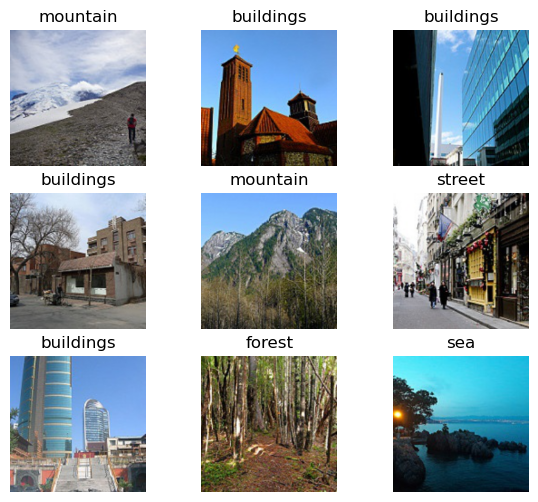

In [5]:
data.show_batch(figsize=(7,6))

In [6]:
data.c #number of classes

6

In [7]:
len(data.train_ds) #length of train data

11228

In [8]:
len(data.valid_ds) # lentgh of test data

2806

In [9]:
print(data.vocab) #classes of data

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


# cration of model

In [10]:
learn = cnn_learner(data, models.resnet18, model_dir='/kaggle/working/', path = Path("."))

/opt/conda/lib/python3.7/site-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0003311311302240938)

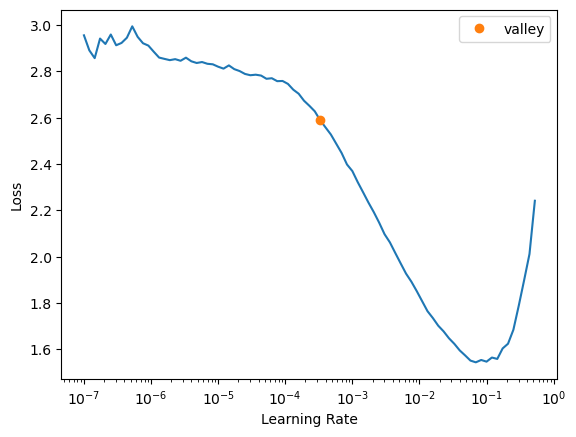

In [11]:
learn.lr_find()
# learn.recorder.plot_model(suggestions=True)

In [12]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40,slice(lr1,lr2))

In [13]:
# p = torch.linspace(0.,1,100)
# f = combine_scheds([0.3,0.7], [SchedCos(0.3,0.6), SchedCos(0.6,0.2)])
# plt.plot(p, [f(o) for o in p]);

In [14]:
# ploting the losses
# learn.recorder.plot_losses()

# Hyper Parameter Tuning

In [15]:
learn.unfreeze()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

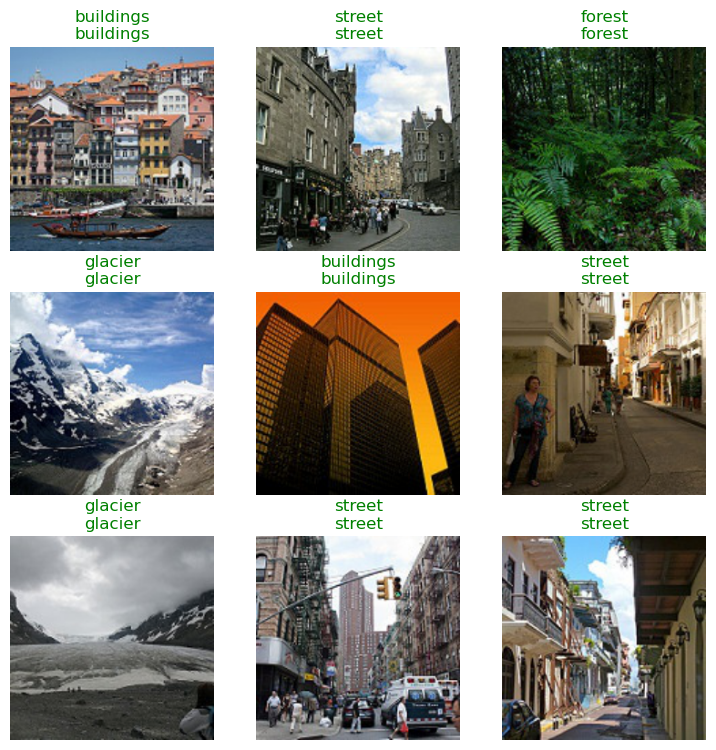

In [16]:
learn.show_results()

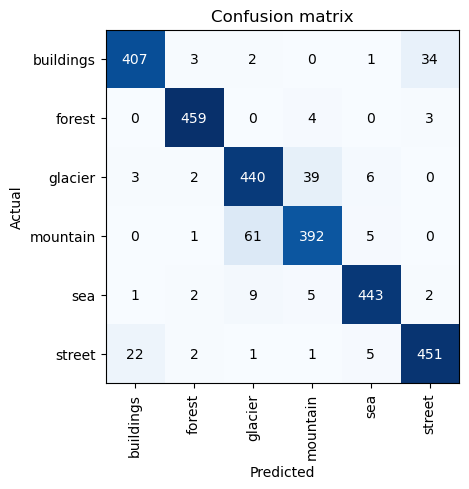

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

# Interpretation of result

In [18]:
# Counting the values of losses
interp.top_losses(largest=True)

(TensorBase([77.9694, 24.5179, 15.8707,  ..., -0.0000, -0.0000, -0.0000]),
 TensorBase([2753,  984, 2559,  ...,  330,  337, 1529]))

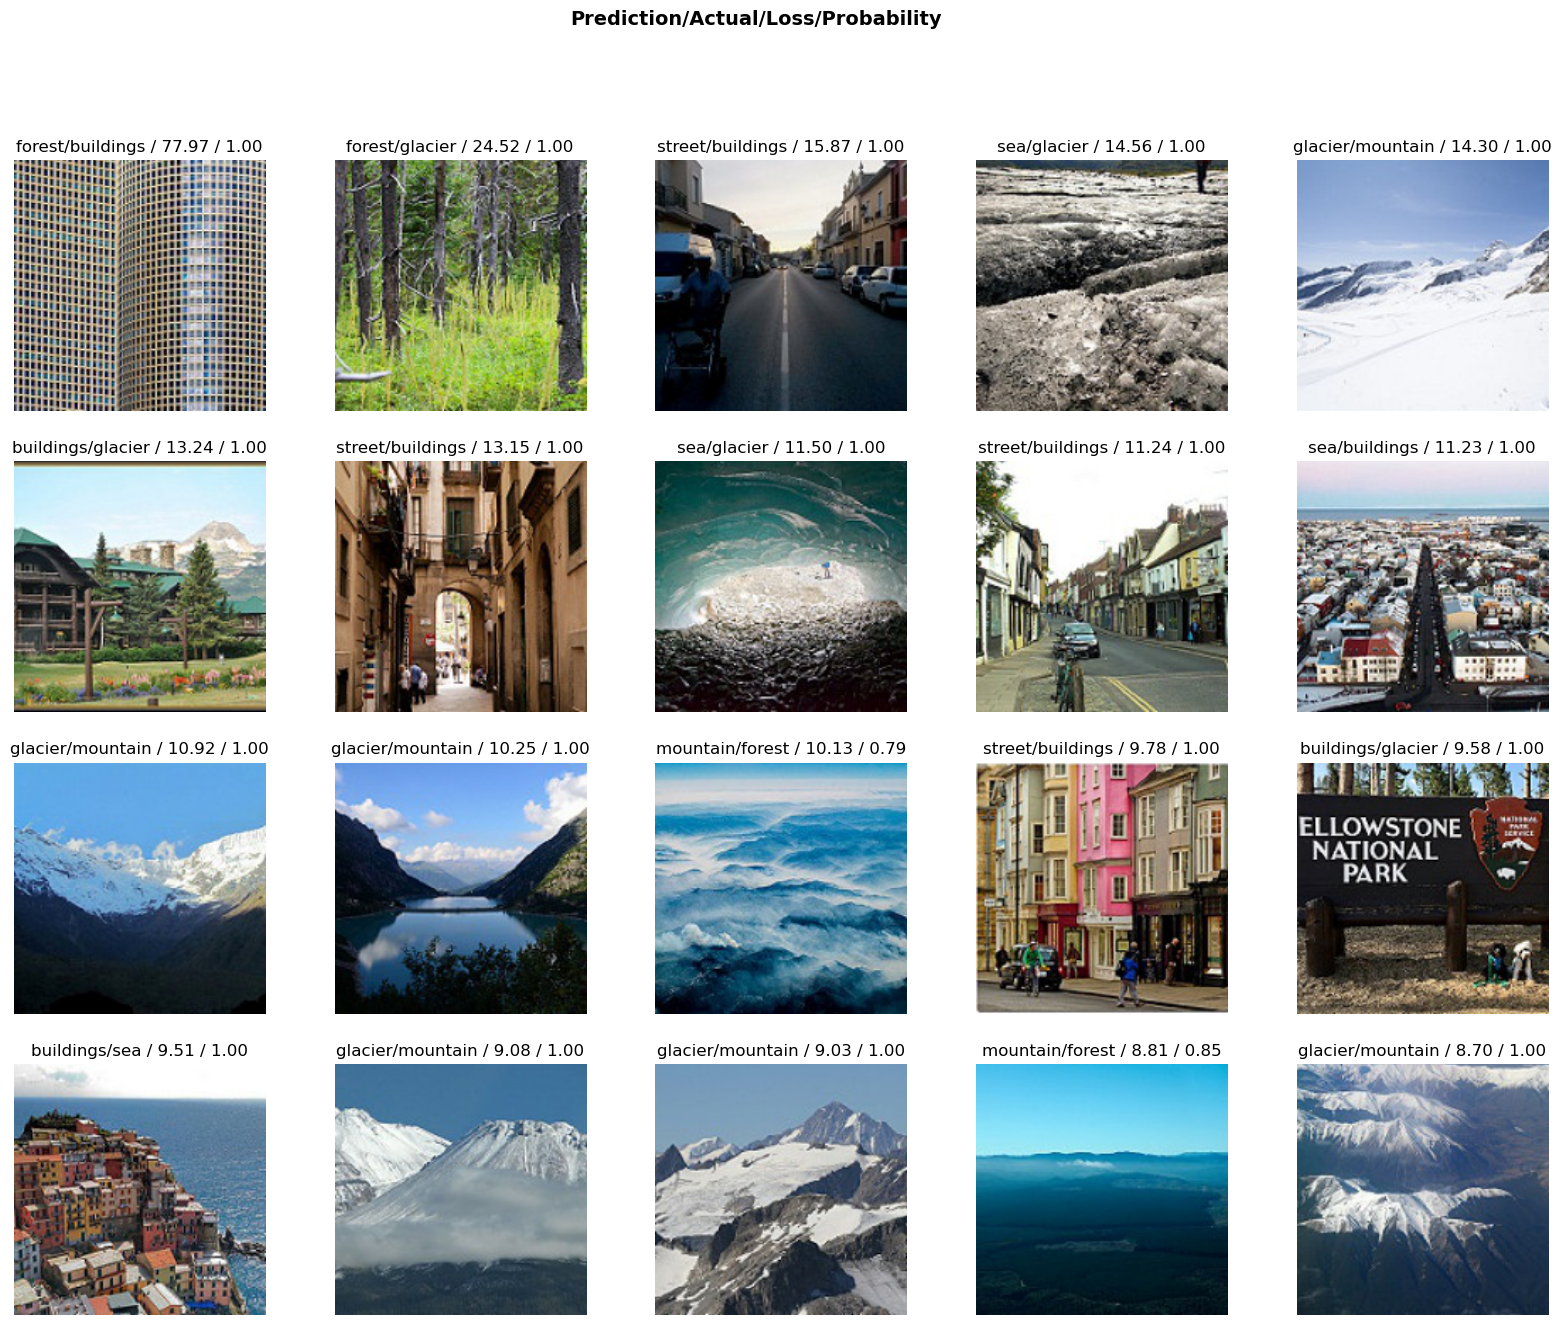

In [19]:
# Comparing the predicted and actual output
interp.plot_top_losses(20,figsize = (20,15))

# prediction using the trained model

In [20]:
# img = open_image('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
# print(learn.predict(img)[0])

In [21]:
im = Image.open('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/21982.jpg')
im_t = cast(array(im), TensorImage)

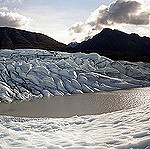

In [22]:
im

In [23]:
im_t

TensorImage([[[196, 203, 231],
              [180, 185, 214],
              [162, 168, 194],
              ...,
              [251, 245, 245],
              [248, 242, 242],
              [250, 245, 242]],

             [[167, 173, 199],
              [165, 171, 195],
              [167, 174, 193],
              ...,
              [231, 227, 226],
              [235, 231, 228],
              [244, 240, 237]],

             [[167, 172, 191],
              [161, 167, 183],
              [171, 177, 191],
              ...,
              [238, 237, 233],
              [245, 244, 240],
              [238, 237, 232]],

             ...,

             [[161, 160, 156],
              [233, 232, 228],
              [255, 255, 250],
              ...,
              [121, 129, 132],
              [155, 163, 166],
              [100, 107, 117]],

             [[127, 126, 124],
              [161, 160, 156],
              [210, 209, 204],
              ...,
              [184, 189, 192],
          

# Saving the model

In [24]:
learn.export(Path("/kaggle/working/export.pkl"))
learn.model_dir = "/kaggle/working"
learn.save("stage-1")

Path('/kaggle/working/stage-1.pth')

In [25]:
# trn_tfms, val_tfms = tfms_from_model(arch,sz) # get transformations
# im = val_tfms(Image.open('image.png'))
# learn.precompute=False # We'll pass in a raw image, not activations
# preds = learn.predict_array(im[None])
# np.argmax(preds) # preds are log probabilities of classes

In [2]:
learn = load_learner('export.pkl')

NotImplementedError: cannot instantiate 'PosixPath' on your system

In [27]:
from PIL import Image

# Load the image
img = Image.open('/kaggle/input/intel-image-classification/seg_train/seg_train/forest/10007.jpg')


# Resize the image to 224x224
img_resized = img.resize((224, 224))

img_resized.save('/kaggle/working/resized_image.png')

# Open the resized image using a web browser
import webbrowser
webbrowser.open('resized_image.png' + '/kaggle/working/')

False

In [37]:
from PIL import Image
img = Image.open('/kaggle/input/intel-image-classification/seg_test/seg_test/buildings/20073.jpg')

# Resize the image to 224x224
img_resized = img.resize((224, 224))
pred, pred_idx, probs = learn.predict(img_resized)

# Print the predicted label and probability
print(f"Predicted label: {pred}, probability: {probs[pred_idx]:.4f}")

Predicted label: buildings, probability: 0.9995


In [ ]:
print("Hello World")

In [30]:
# !pip install Pillow

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)


In [32]:
from PIL import Image